In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf


In [ ]:
print("--> Checking for physical Tensorflow devices")
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

--> Checking for physical Tensorflow devices
: /physical_device:CPU:0
: /physical_device:GPU:0


In [ ]:
!unzip -q /content/gdrive/MyDrive/CMPE255_ASL_PROJECT/Data.zip

In [ ]:
dataset_path = '/content/asl_alphabet_train/asl_alphabet_train'


In [ ]:
Efficientnet_b0 = 'https://tfhub.dev/google/efficientnet/b0/classification/1'


In [ ]:
import os
import tensorflow_hub as hub
import tensorflow as tf
import pathlib
import cv2
from sklearn.utils import shuffle
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2)

test_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

In [ ]:
# GPU setup
batch_size = 32
img_height = 224
img_width = 224
train_data = train_data_generator.flow_from_directory(
    dataset_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = test_data_generator.flow_from_directory(
    dataset_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


## Efficientnet_b0

In [ ]:
Efficientnet_b0 = 'https://tfhub.dev/google/efficientnet/b0/classification/1'


In [ ]:
model_Efficientnet = tf.keras.Sequential([
    hub.KerasLayer(Efficientnet_b0, input_shape = (224,224,3), name = 'Efficientnet_b0'),

    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(29, activation = 'softmax', name = 'Output_layer')
])



In [ ]:
#model_Efficientnet.trainable = False

In [ ]:
model_Efficientnet.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
model_Efficientnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Efficientnet_b0 (KerasLayer  (None, 1000)             5330564   
 )                                                               
                                                                 
 dense (Dense)               (None, 512)               512512    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 Output_layer (Dense)        (None, 29)                14877     
                                                                 
Total params: 5,857,953
Trainable params: 527,389
Non-trainable params: 5,330,564
_________________________________________________________________


In [ ]:
efficientnet_model = model_Efficientnet.fit(train_data, epochs = 15, verbose = 1, validation_data=val_data)


Epoch 1/15
2175/2175 [==============================] - 782s 354ms/step - loss: 0.5883 - accuracy: 0.8147 - val_loss: 0.4524 - val_accuracy: 0.8506
Epoch 2/15
2175/2175 [==============================] - 764s 351ms/step - loss: 0.3187 - accuracy: 0.8959 - val_loss: 0.4050 - val_accuracy: 0.8695
Epoch 3/15
2175/2175 [==============================] - 762s 350ms/step - loss: 0.2797 - accuracy: 0.9099 - val_loss: 0.3575 - val_accuracy: 0.8874
Epoch 4/15
2175/2175 [==============================] - 765s 352ms/step - loss: 0.2627 - accuracy: 0.9164 - val_loss: 0.3830 - val_accuracy: 0.8879
Epoch 5/15
2175/2175 [==============================] - 763s 351ms/step - loss: 0.2375 - accuracy: 0.9250 - val_loss: 0.3765 - val_accuracy: 0.8907
Epoch 6/15
2175/2175 [==============================] - 763s 351ms/step - loss: 0.2233 - accuracy: 0.9292 - val_loss: 0.4789 - val_accuracy: 0.8797
Epoch 7/15
2175/2175 [==============================] - 762s 350ms/step - loss: 0.2202 - accuracy: 0.9311 - val_

In [ ]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')



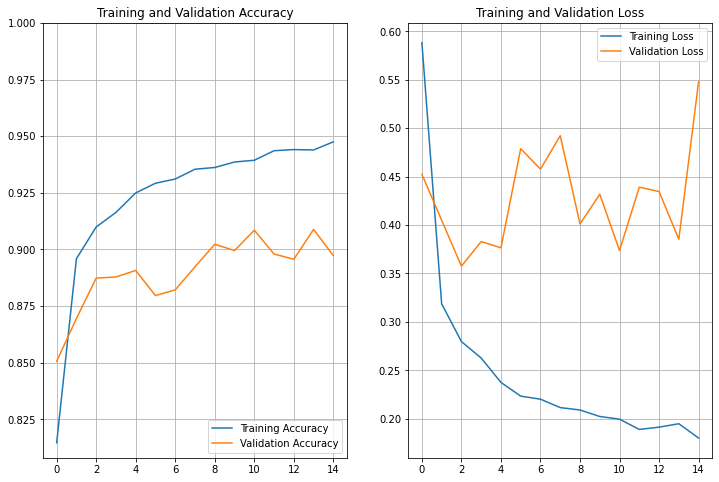

In [ ]:
plot_history(efficientnet_model, 'accuracy', 'val_accuracy')

In [ ]:
model_Efficientnet.save('/content/gdrive/MyDrive/CMPE255_ASL_PROJECT/Efficientnet_model_new.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# model_Efficientnet = load_model('/content/gdrive/MyDrive/CMPE255_ASL_PROJECT/Efficientnet_model.h5', custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
# efficientnet_model = model_Efficientnet.fit(train_data, epochs = 1, verbose = 1, validation_data=val_data)


## MobileNetV2


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
])

for image, _ in trainingData.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

NameError: ignored

In [ ]:
IMG_SIZE = (256, 256)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

In [ ]:
image_batch, label_batch = next(iter(train_data_generator))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

In [ ]:
base_model.trainable = False

base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
prediction_layer = tf.keras.layers.Dense(29)
prediction_batch = prediction_layer(feature_batch_average)

inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.trainable_variables

In [ ]:
initialLoss,initialAccuracy = model.evaluate(test_data_generator)

In [ ]:
print("initial accuracy: "+str(initialAccuracy))
print("initial loss: "+str(initialLoss))


In [ ]:
history = model.fit(train_data_generator,epochs=20,validation_data=test_data_generator)

In [ ]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()


plot_history(history, 'accuracy', 'val_accuracy')

## Inception ResNet V2

In [ ]:
inceptionResNetV2 = 'https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/5'

In [ ]:
model_inceptionResNetV2 = tf.keras.Sequential([
    hub.KerasLayer(inceptionResNetV2, input_shape = (224,224,3),
               trainable=True, arguments=dict(batch_norm_momentum=0.997), name = 'inceptionResNetV2_layer'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(29, activation = 'softmax', name = 'Output_layer')
])

model_inceptionResNetV2.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
model_inceptionResNetV2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inceptionResNetV2_layer (Ke  (None, 1001)             55875273  
 rasLayer)                                                       
                                                                 
 flatten (Flatten)           (None, 1001)              0         
                                                                 
 Output_layer (Dense)        (None, 29)                29058     
                                                                 
Total params: 55,904,331
Trainable params: 55,843,787
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
inceptionResNetV2_model = model_inceptionResNetV2.fit(train_data, epochs = 15, verbose = 1, validation_data=val_data)


Epoch 1/15
2175/2175 [==============================] - 827s 363ms/step - loss: 0.8454 - accuracy: 0.9227 - val_loss: 84.7432 - val_accuracy: 0.0602
Epoch 2/15
2175/2175 [==============================] - 785s 361ms/step - loss: 0.6218 - accuracy: 0.9651 - val_loss: 0.8700 - val_accuracy: 0.8786
Epoch 3/15
2175/2175 [==============================] - 784s 360ms/step - loss: 0.5497 - accuracy: 0.9688 - val_loss: 0.4865 - val_accuracy: 0.9709
Epoch 4/15
2175/2175 [==============================] - 783s 360ms/step - loss: 0.4889 - accuracy: 0.9721 - val_loss: 0.4396 - val_accuracy: 0.9733
Epoch 5/15
2175/2175 [==============================] - 783s 360ms/step - loss: 0.4346 - accuracy: 0.9760 - val_loss: 0.4953 - val_accuracy: 0.9544
Epoch 6/15
2175/2175 [==============================] - 784s 360ms/step - loss: 0.3905 - accuracy: 0.9777 - val_loss: 0.6402 - val_accuracy: 0.9167
Epoch 7/15
2175/2175 [==============================] - 782s 360ms/step - loss: 0.3970 - accuracy: 0.9776 - val

In [ ]:
model_inceptionResNetV2.save('/content/gdrive/MyDrive/CMPE255_ASL_PROJECT/model_inceptionResNetV2.h5')

In [ ]:
plot_history(inceptionResNetV2_model, 'accuracy', 'val_accuracy')

NameError: ignored

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/plot.txt',sep=',')
df1 = df.drop([5])
df1

,loss,acc,val_loss,val_acc
0,0.6218,0.9651,0.8700,0.8786
1,0.5497,0.9688,0.4865,0.9709
2,0.4889,0.9721,0.4396,0.9733
3,0.4346,0.9760,0.4953,0.9544
4,0.3905,0.9777,0.6402,0.9167
6,0.3748,0.9801,0.4148,0.9670
7,0.3339,0.9810,0.4716,0.9299
8,0.3291,0.9800,0.3209,0.9857
9,0.2965,0.9831,0.6499,0.9010
10,0.2942,0.9816,0.4763,0.9486


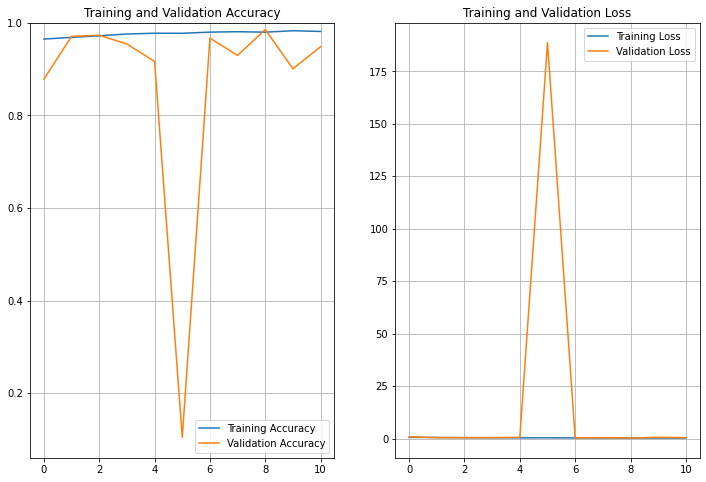

In [ ]:
acc=df.acc.values
val_acc=df.val_acc.values
loss = df.loss.values
val_loss =df.val_loss.values
epochs_range = range(len(acc))

fig=plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim([min(plt.ylim()),1])
plt.grid(True)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()

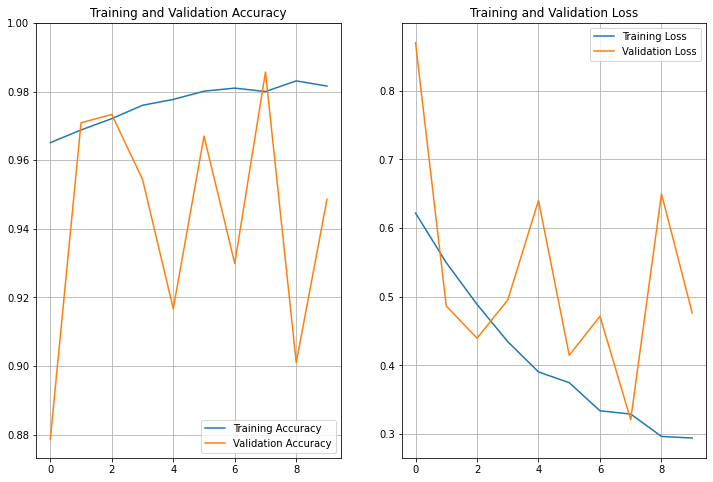

In [ ]:
acc=df1.acc.values
val_acc=df1.val_acc.values
loss = df1.loss.values
val_loss =df1.val_loss.values
epochs_range = range(len(acc))

fig=plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim([min(plt.ylim()),1])
plt.grid(True)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/297Final/submit/part-00000-d8a0e6f0-8b0f-4f9d-a81e-fde7b034bd47-c000.csv')
df3 = pd.read_csv('/content/drive/MyDrive/297Final/submit/part-00001-d8a0e6f0-8b0f-4f9d-a81e-fde7b034bd47-c000.csv')

In [ ]:
df2.columns=['predict']
df3.columns=['predict']

In [ ]:
test=df2.append(df3)

In [ ]:
test.to_csv('firssubmit.csv')

predict    0
dtype: int64

In [ ]:
testdata=pd.read_csv('/content/drive/MyDrive/297Final/test.dat')

In [ ]:
testdata.shape

(2153, 1)